In [1]:
!tree -d /kaggle/input/cric-pose

/kaggle/input/cric-pose
|-- cover
|-- defense
|-- flick
|-- hook
|-- late_cut
|-- lofted
|-- pull
|-- square_cut
|-- straight
`-- sweep

10 directories


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


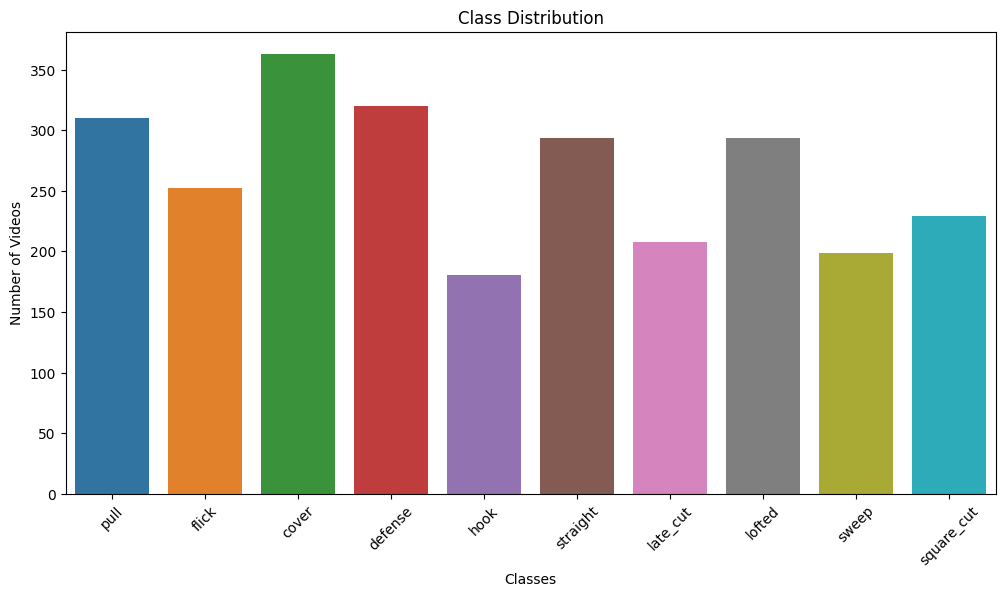

KeyboardInterrupt: 

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from glob import glob

# Set the directory path
data_dir = '/kaggle/input/cric-pose'

# Function to get all file paths
def get_file_paths(data_dir):
    file_paths = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.mp4'):
                file_paths.append(os.path.join(root, file))
    return file_paths

# 1. Directory Structure & Class Distribution
def plot_class_distribution(file_paths):
    classes = [os.path.basename(os.path.dirname(fp)) for fp in file_paths]
    class_counts = Counter(classes)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Number of Videos')
    plt.xticks(rotation=45)
    plt.show()

# 2. Video Duration Analysis
def plot_video_duration(file_paths):
    video_lengths = []
    
    for fp in file_paths:
        cap = cv2.VideoCapture(fp)
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        duration = length / fps
        video_lengths.append(duration)
        cap.release()
    
    plt.figure(figsize=(12, 6))
    sns.histplot(video_lengths, bins=30, kde=True)
    plt.title('Distribution of Video Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of Videos')
    plt.show()

# 3. Frame Sampling & Visualization
def sample_frames(file_paths, num_samples=5):
    for fp in np.random.choice(file_paths, num_samples):
        cap = cv2.VideoCapture(fp)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        sample_frame_no = np.random.randint(0, total_frames)
        
        cap.set(cv2.CAP_PROP_POS_FRAMES, sample_frame_no)
        ret, frame = cap.read()
        if ret:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f'Sample Frame from {os.path.basename(fp)}')
            plt.show()
        cap.release()

# 4. Pose Keypoint Distribution (Assuming keypoints are stored)
def plot_keypoint_distribution(keypoint_data):
    keypoints = np.concatenate(keypoint_data, axis=0)  # Assuming keypoint_data is a list of arrays
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(np.histogram2d(keypoints[:, 0], keypoints[:, 1], bins=50)[0])
    plt.title('Pose Keypoint Distribution')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.show()

# 5. Temporal Analysis (Frame-by-Frame Comparison)
def compare_frames(file_path):
    cap = cv2.VideoCapture(file_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if total_frames > 1:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        ret, frame1 = cap.read()
        
        cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)
        ret, frame2 = cap.read()
        
        diff = cv2.absdiff(frame1, frame2)
        plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
        plt.title(f'Frame Comparison in {os.path.basename(file_path)}')
        plt.show()
    
    cap.release()

# 6. Data Augmentation Visualization (Example)
def visualize_augmentation(file_path):
    cap = cv2.VideoCapture(file_path)
    ret, frame = cap.read()
    
    if ret:
        augmented_frame = cv2.flip(frame, 1)  # Example augmentation: horizontal flip
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Original Frame')
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(augmented_frame, cv2.COLOR_BGR2RGB))
        plt.title('Augmented Frame')
        plt.show()
    
    cap.release()

# 7. Correlation & Redundancy (Using Pose Keypoints)
def calculate_keypoint_correlation(keypoint_data):
    keypoints = np.concatenate(keypoint_data, axis=0)  # Assuming keypoint_data is a list of arrays
    correlation_matrix = np.corrcoef(keypoints.T)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Keypoint Correlation Matrix')
    plt.show()

# 8. Dataset Splitting Check
def plot_dataset_split(train_files, val_files, test_files):
    counts = [len(train_files), len(val_files), len(test_files)]
    labels = ['Train', 'Validation', 'Test']
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=labels, y=counts)
    plt.title('Dataset Split Distribution')
    plt.xlabel('Dataset')
    plt.ylabel('Number of Videos')
    plt.show()

# 9. Class Weights Calculation
def calculate_class_weights(file_paths):
    classes = [os.path.basename(os.path.dirname(fp)) for fp in file_paths]
    class_counts = Counter(classes)
    total = sum(class_counts.values())
    class_weights = {cls: total / count for cls, count in class_counts.items()}
    return class_weights

# Example Usage
file_paths = get_file_paths(data_dir)

# 1. Plot Class Distribution
plot_class_distribution(file_paths)

# 2. Plot Video Duration Distribution
plot_video_duration(file_paths)

# 3. Sample Frames from Videos
sample_frames(file_paths, num_samples=5)

# 4. Plot Keypoint Distribution (Assuming keypoint data available)
# plot_keypoint_distribution(keypoint_data)

# 5. Compare Frames within a Video
compare_frames(file_paths[0])

# 6. Visualize Augmentation
visualize_augmentation(file_paths[0])

# 7. Calculate Keypoint Correlation (Assuming keypoint data available)
# calculate_keypoint_correlation(keypoint_data)

# 8. Plot Dataset Split Distribution
# Assuming you have lists of file paths for train, val, and test datasets
# plot_dataset_split(train_files, val_files, test_files)

# 9. Calculate Class Weights
class_weights = calculate_class_weights(file_paths)
print("Class Weights:", class_weights)


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from glob import glob

# Set Seaborn style for aesthetics
sns.set(style="whitegrid", palette="muted")

# Function to get all file paths
def get_file_paths(data_dir):
    file_paths = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.mp4'):
                file_paths.append(os.path.join(root, file))
    return file_paths

# 1. Directory Structure & Class Distribution
def plot_class_distribution(file_paths):
    classes = [os.path.basename(os.path.dirname(fp)) for fp in file_paths]
    class_counts = Counter(classes)
    
    plt.figure(figsize=(14, 7))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")
    plt.title('Class Distribution', fontsize=16, weight='bold')
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Number of Videos', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    sns.despine()
    plt.show()

# 2. Video Duration Analysis
def plot_video_duration(file_paths):
    video_lengths = []
    
    for fp in file_paths:
        cap = cv2.VideoCapture(fp)
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        duration = length / fps
        video_lengths.append(duration)
        cap.release()
    
    plt.figure(figsize=(14, 7))
    sns.histplot(video_lengths, bins=30, kde=True, color="coral")
    plt.title('Distribution of Video Durations', fontsize=16, weight='bold')
    plt.xlabel('Duration (seconds)', fontsize=14)
    plt.ylabel('Number of Videos', fontsize=14)
    sns.despine()
    plt.show()

# 3. Frame Sampling & Visualization
def sample_frames(file_paths, num_samples=5):
    for fp in np.random.choice(file_paths, num_samples):
        cap = cv2.VideoCapture(fp)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        sample_frame_no = np.random.randint(0, total_frames)
        
        cap.set(cv2.CAP_PROP_POS_FRAMES, sample_frame_no)
        ret, frame = cap.read()
        if ret:
            plt.figure(figsize=(7, 7))
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f'Sample Frame from {os.path.basename(fp)}', fontsize=14, weight='bold')
            plt.axis('off')
            plt.show()
        cap.release()

# 4. Pose Keypoint Distribution (Assuming keypoints are stored)
def plot_keypoint_distribution(keypoint_data):
    keypoints = np.concatenate(keypoint_data, axis=0)  # Assuming keypoint_data is a list of arrays
    
    plt.figure(figsize=(14, 7))
    sns.heatmap(np.histogram2d(keypoints[:, 0], keypoints[:, 1], bins=50)[0], cmap='Blues')
    plt.title('Pose Keypoint Distribution', fontsize=16, weight='bold')
    plt.xlabel('X Position', fontsize=14)
    plt.ylabel('Y Position', fontsize=14)
    sns.despine()
    plt.show()

# 5. Temporal Analysis (Frame-by-Frame Comparison)
def compare_frames(file_path):
    cap = cv2.VideoCapture(file_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if total_frames > 1:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        ret, frame1 = cap.read()
        
        cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)
        ret, frame2 = cap.read()
        
        diff = cv2.absdiff(frame1, frame2)
        
        plt.figure(figsize=(7, 7))
        plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
        plt.title(f'Frame Comparison in {os.path.basename(file_path)}', fontsize=14, weight='bold')
        plt.axis('off')
        plt.show()
    
    cap.release()

# 6. Data Augmentation Visualization (Example)
def visualize_augmentation(file_path):
    cap = cv2.VideoCapture(file_path)
    ret, frame = cap.read()
    
    if ret:
        augmented_frame = cv2.flip(frame, 1)  # Example augmentation: horizontal flip
        
        plt.figure(figsize=(14, 7))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Original Frame', fontsize=14, weight='bold')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(augmented_frame, cv2.COLOR_BGR2RGB))
        plt.title('Augmented Frame', fontsize=14, weight='bold')
        plt.axis('off')
        
        plt.show()
    
    cap.release()

# 7. Correlation & Redundancy (Using Pose Keypoints)
def calculate_keypoint_correlation(keypoint_data):
    keypoints = np.concatenate(keypoint_data, axis=0)  # Assuming keypoint_data is a list of arrays
    correlation_matrix = np.corrcoef(keypoints.T)
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Keypoint Correlation Matrix', fontsize=16, weight='bold')
    sns.despine()
    plt.show()

# 8. Dataset Splitting Check
def plot_dataset_split(train_files, val_files, test_files):
    counts = [len(train_files), len(val_files), len(test_files)]
    labels = ['Train', 'Validation', 'Test']
    
    plt.figure(figsize=(10, 7))
    sns.barplot(x=labels, y=counts, palette="viridis")
    plt.title('Dataset Split Distribution', fontsize=16, weight='bold')
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel('Number of Videos', fontsize=14)
    sns.despine()
    plt.show()

# 9. Class Weights Calculation
def calculate_class_weights(file_paths):
    classes = [os.path.basename(os.path.dirname(fp)) for fp in file_paths]
    class_counts = Counter(classes)
    total = sum(class_counts.values())
    class_weights = {cls: total / count for cls, count in class_counts.items()}
    return class_weights

# Example Usage
file_paths = get_file_paths('path/to/cric-pose')

# 1. Plot Class Distribution
plot_class_distribution(file_paths)

# 2. Plot Video Duration Distribution
plot_video_duration(file_paths)

# 3. Sample Frames from Videos
sample_frames(file_paths, num_samples=5)

# 4. Plot Keypoint Distribution (Assuming keypoint data available)
# plot_keypoint_distribution(keypoint_data)

# 5. Compare Frames within a Video
compare_frames(file_paths[0])

# 6. Visualize Augmentation
visualize_augmentation(file_paths[0])

# 7. Calculate Keypoint Correlation (Assuming keypoint data available)
# calculate_keypoint_correlation(keypoint_data)

# 8. Plot Dataset Split Distribution
# Assuming you have lists of file paths for train, val, and test datasets
# plot_dataset_split(train_files, val_files, test_files)

# 9. Calculate Class Weights
class_weights = calculate_class_weights(file_paths)
print("Class Weights:", class_weights)


In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from glob import glob

# Function to get all file paths
def get_file_paths(data_dir, extension=".mp4"):
    return glob(os.path.join(data_dir, '**', f'*{extension}'), recursive=True)

# Function to calculate image size in megapixels
def calculate_image_size(frame):
    return (frame.shape[1] * frame.shape[0]) / 1_000_000  # width * height in megapixels

# Function to compute dataset statistics
def compute_dataset_statistics(data_dir):
    file_paths = get_file_paths(data_dir, extension=".mp4")
    image_sizes = []
    annotations = []
    class_distribution = []

    for file_path in file_paths:
        cap = cv2.VideoCapture(file_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        ret, frame = cap.read()
        if ret:
            image_size = calculate_image_size(frame)
            image_sizes.append(image_size)
        
        # Assume the annotations are in a corresponding text file with the same base name
        annotation_file = file_path.replace('.mp4', '.txt')
        if os.path.exists(annotation_file):
            with open(annotation_file, 'r') as f:
                lines = f.readlines()
                annotations.append(len(lines))  # Count the number of bounding boxes
                for line in lines:
                    class_id = int(line.split()[0])  # Assuming first column is the class ID
                    class_distribution.append(class_id)

        cap.release()
    
    # Calculate overall statistics
    total_images = len(file_paths)
    avg_image_size = np.mean(image_sizes)
    min_image_size = np.min(image_sizes)
    max_image_size = np.max(image_sizes)
    median_image_size = np.median(image_sizes)
    total_annotations = np.sum(annotations)
    avg_annotations_per_image = np.mean(annotations)
    unique_classes = len(set(class_distribution))
    median_image_resolution = sorted(image_sizes)[len(image_sizes) // 2]

    # Dataset splitting statistics
    train_split = 0.7
    val_split = 0.2
    test_split = 0.1

    train_images = int(total_images * train_split)
    val_images = int(total_images * val_split)
    test_images = total_images - train_images - val_images

    # Prepare data for class distribution plot
    class_counts = pd.Series(class_distribution).value_counts()

    # Print summary statistics
    print(f"Total Images: {total_images}")
    print(f"Average Image Size: {avg_image_size:.2f} MP")
    print(f"Minimum Image Size: {min_image_size:.2f} MP")
    print(f"Maximum Image Size: {max_image_size:.2f} MP")
    print(f"Median Image Size: {median_image_size:.2f} MP")
    print(f"Total Annotations: {total_annotations}")
    print(f"Annotations per Image (average): {avg_annotations_per_image:.2f}")
    print(f"Unique Classes: {unique_classes}")
    print(f"Median Image Resolution: {median_image_resolution:.2f} MP")
    print(f"Train Set: {train_images} images")
    print(f"Validation Set: {val_images} images")
    print(f"Test Set: {test_images} images")

    # Create plots for class distribution and other visualizations
    plot_class_distribution(class_counts)
    plot_image_size_distribution(image_sizes)
    plot_annotations_per_image(annotations)

# Plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(class_counts):
    plt.figure(figsize=(14, 7))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
    plt.title('Class Distribution', fontsize=16, weight='bold')
    plt.xlabel('Class ID', fontsize=14)
    plt.ylabel('Number of Annotations', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    sns.despine()
    plt.show()

def plot_image_size_distribution(image_sizes):
    plt.figure(figsize=(14, 7))
    sns.histplot(image_sizes, bins=30, kde=True, color="coral")
    plt.title('Image Size Distribution (in MP)', fontsize=16, weight='bold')
    plt.xlabel('Image Size (MP)', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    sns.despine()
    plt.show()

def plot_annotations_per_image(annotations):
    plt.figure(figsize=(14, 7))
    sns.histplot(annotations, bins=30, kde=True, color="skyblue")
    plt.title('Annotations per Image Distribution', fontsize=16, weight='bold')
    plt.xlabel('Number of Annotations per Image', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    sns.despine()
    plt.show()

# Example Usage
data_dir = '/kaggle/input/yolo-pose-ano-2/cricshot-yolo-ano'
compute_dataset_statistics(data_dir)


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Total Images: 2650
Average Image Size: 1.16 MP
Minimum Image Size: 0.23 MP
Maximum Image Size: 3.69 MP
Median Image Size: 0.92 MP
Total Annotations: 0.0
Annotations per Image (average): nan
Unique Classes: 0
Median Image Resolution: 0.92 MP
Train Set: 1854 images
Validation Set: 530 images
Test Set: 266 images


ValueError: min() arg is an empty sequence

<Figure size 1400x700 with 0 Axes>

Total Videos: 2650
Mean Duration: 2.41 s
Standard Deviation of Duration: 3.55 s
Minimum Duration: 0.78 s
Maximum Duration: 130.75 s
Video Resolutions: {(1920, 1080), (720, 480), (640, 480), (854, 478), (1280, 720), (640, 360), (2560, 1440)}


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


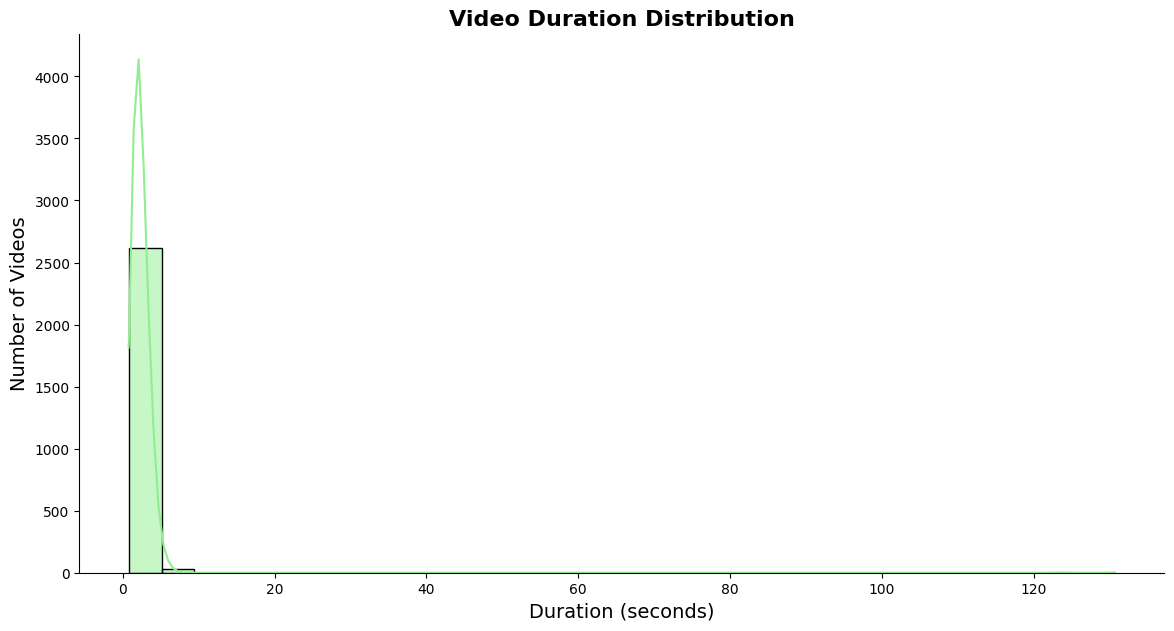

In [4]:
import os
import cv2
import numpy as np

# Function to get all video file paths
def get_video_file_paths(data_dir, extension=".mp4"):
    return [os.path.join(root, file) 
            for root, dirs, files in os.walk(data_dir) 
            for file in files if file.endswith(extension)]

# Function to calculate video duration and resolution
def get_video_info(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    resolution = (width, height)
    cap.release()
    return duration, resolution

# Function to compute video statistics
def compute_video_statistics(data_dir):
    video_paths = get_video_file_paths(data_dir)
    durations = []
    resolutions = set()
    
    for video_path in video_paths:
        duration, resolution = get_video_info(video_path)
        durations.append(duration)
        resolutions.add(resolution)

    # Calculate statistics
    mean_duration = np.mean(durations)
    std_duration = np.std(durations)
    min_duration = np.min(durations)
    max_duration = np.max(durations)

    print(f"Total Videos: {len(video_paths)}")
    print(f"Mean Duration: {mean_duration:.2f} s")
    print(f"Standard Deviation of Duration: {std_duration:.2f} s")
    print(f"Minimum Duration: {min_duration:.2f} s")
    print(f"Maximum Duration: {max_duration:.2f} s")
    
    print(f"Video Resolutions: {resolutions}")

    # Plotting video duration distribution
    plot_video_duration_distribution(durations)

# Plotting function for video durations
import matplotlib.pyplot as plt
import seaborn as sns

def plot_video_duration_distribution(durations):
    plt.figure(figsize=(14, 7))
    sns.histplot(durations, bins=30, kde=True, color="lightgreen")
    plt.title('Video Duration Distribution', fontsize=16, weight='bold')
    plt.xlabel('Duration (seconds)', fontsize=14)
    plt.ylabel('Number of Videos', fontsize=14)
    sns.despine()
    plt.show()

# Example Usage
data_dir = '/kaggle/input/yolo-pose-ano-2/cricshot-yolo-ano'
compute_video_statistics(data_dir)


Total Videos: 2650
Total Size: 2717.58 MB
Mean Size: 1.03 MB
Standard Deviation of Size: 1.09 MB
Minimum Size: 0.19 MB
Maximum Size: 41.90 MB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


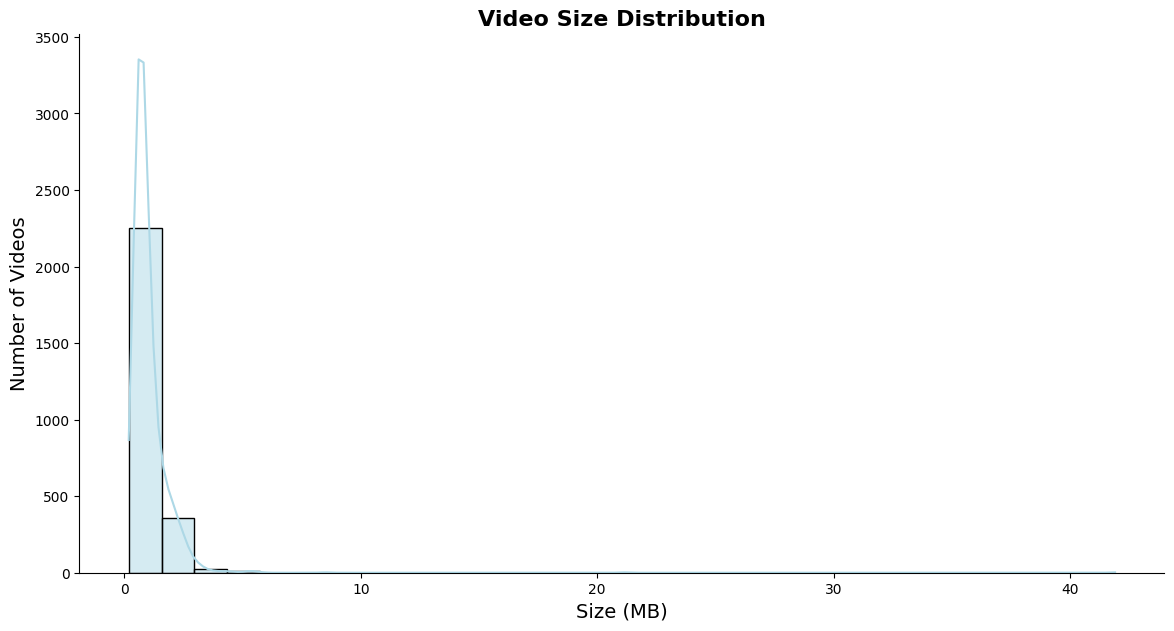

In [6]:
import os
import cv2
import numpy as np

# Function to get all video file paths
def get_video_file_paths(data_dir, extension=".mp4"):
    return [os.path.join(root, file) 
            for root, dirs, files in os.walk(data_dir) 
            for file in files if file.endswith(extension)]

# Function to calculate the size of each video file
def get_video_size(video_path):
    return os.path.getsize(video_path) / (1024 * 1024)  # size in MB

# Function to compute video size statistics
def compute_video_size_statistics(data_dir):
    video_paths = get_video_file_paths(data_dir)
    sizes = [get_video_size(video_path) for video_path in video_paths]

    # Calculate statistics
    total_size = np.sum(sizes)
    mean_size = np.mean(sizes)
    std_size = np.std(sizes)
    min_size = np.min(sizes)
    max_size = np.max(sizes)

    print(f"Total Videos: {len(video_paths)}")
    print(f"Total Size: {total_size:.2f} MB")
    print(f"Mean Size: {mean_size:.2f} MB")
    print(f"Standard Deviation of Size: {std_size:.2f} MB")
    print(f"Minimum Size: {min_size:.2f} MB")
    print(f"Maximum Size: {max_size:.2f} MB")
    
    # Plotting video size distribution
    plot_video_size_distribution(sizes)

# Plotting function for video sizes
import matplotlib.pyplot as plt
import seaborn as sns

def plot_video_size_distribution(sizes):
    plt.figure(figsize=(14, 7))
    sns.histplot(sizes, bins=30, kde=True, color="lightblue")
    plt.title('Video Size Distribution', fontsize=16, weight='bold')
    plt.xlabel('Size (MB)', fontsize=14)
    plt.ylabel('Number of Videos', fontsize=14)
    sns.despine()
    plt.show()

# Example Usage
data_dir = '/kaggle/input/yolo-pose-ano-2/cricshot-yolo-ano'
compute_video_size_statistics(data_dir)


In [8]:
import os

# Directory path
base_dir = '/kaggle/input/yolo-pose-ano-2/cricshot-yolo-ano'

# Subdirectory classes
subdirs = [
    'cover', 'defense', 'flick', 'hook', 'late_cut',
    'lofted', 'pull', 'square_cut', 'straight', 'sweep'
]

# Dictionary to store counts
file_counts = {}

# Count .mp4 files in each subdirectory
for subdir in subdirs:
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        mp4_files = [f for f in os.listdir(subdir_path) if f.endswith('.mp4')]
        file_counts[subdir] = len(mp4_files)

# Print table
print(f"{'Subdirectory':<15} | {'Number of .mp4 Files':<20}")
print("-" * 35)
for subdir, count in file_counts.items():
    print(f"{subdir:<15} | {count:<20}")


Subdirectory    | Number of .mp4 Files
-----------------------------------
cover           | 363                 
defense         | 320                 
flick           | 252                 
hook            | 181                 
late_cut        | 208                 
lofted          | 294                 
pull            | 310                 
square_cut      | 229                 
straight        | 294                 
sweep           | 199                 
